# Project 1: SAT & ACT Analysis



## Problem Statement

There has been a change in several changes in the participation rates in both the SAT and ACT exams between the years 2017 and 2018. This report seeks to explore the reasons for these changes within the U.S categorized by states.

## Executive Summary  
First of all errors such as extra characters were rectified and percentages were removed to convert all numerical data in numbers with decimal points. 
Then data was found to match the fields of 2017's data. The cleaned-up data from both 2017 and 2018 were combined to a single data frame for the ease of comparison.  
After that, The standard deviation for each numerical variable was calculated using three different methods. The highest and lowest states were identified in terms of participation rates and scores.  
Histograms, boxplots, heat maps, and scatterplots were used to investigate the data and correlations further.  
Most of the statistics have close to normal distribution. Although the data points add up to more than 30. More data points would further ensure a closer to normal distribution for the numerical variables used in this report.  
Research has been undertaken from the official State Education Departments and other related articles. Some of these include the details of state policies with regards to the compulsory taking of the exams and/or the sponsoring of test fees.  
The states of West Virginia, Ohio, Rhode Island, and Illinois are examples of such policies that greatly impacted SAT participation rates. The SAT day, which happens on a regular school day also contributed to an increase in the overall SAT participation rate.
Focus on collaboration with state education departments, colleges, and high schools would likely lead to a continued increase in SAT participation rates.

### Contents 
- **[2017 Data Import & Cleaning](#Data-Import-and-Cleaning)**  

- **[2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)**  

- **[Exploratory Data Analysis](#Exploratory-Data-Analysis)**. 

- **[Data Visualization](#Visualize-the-data)**. 

- **[Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)**.   

- **[Outside Research](#Outside-Research)**  

- **[Conclusions and Recommendations](#Conclusions-and-Recommendations)**  

## Loading Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1.1)

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files 

In [16]:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to jupyter notebook

In [17]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [18]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

<p style="color:green;font-weight:bold;">
Answer: The data sets for SAT and ACT scores are listed according to the states in USA. ACT scores are based on English, math, Reading, Science, Composite and SAT scores are based on Participation, Evidence-Based Reading and Writing, Math.
</p>

#### 4a. Does the data look complete? 

Checking missing data in both dataframe

In [19]:
sat_2017.isnull().sum().sum()

0

In [20]:
act_2017.isnull().sum().sum()

0

<p style="color:green;font-weight:bold;">
Answer: Yes, the data looks complete.
</p>

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

For both Dataset checking Descriptive statistics for the numerical variables

In [21]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [22]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [23]:
sat_2017['Math'].sort_values().head()

20     52
8     468
7     492
12    493
22    495
Name: Math, dtype: int64

In [24]:
act_2017['Science'].sort_values().head()

21     2.3
29    18.2
25    18.8
41    18.9
34    19.3
Name: Science, dtype: float64

<p style="color:green;font-weight:bold;">
Answer:
    <br>
    For SAT-
    <br>
    1.  The minimum possible value is 52.0 and maximum possible value is 1295.
    <br>
    2. In the source of the SAT 2017 dataset, we can see the Math score for Maryland is 524. But here sat_2017 has only 52. But the total is the same as the source. 
    <br>
    For ACT-
    <br>
    1.The minimum possible value is 2.30 and maximum possible value is 26.
    <br>
    2. The value for Science in act_2017 is 2.3 but from source we can see possible score is 23.2
</p>

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [25]:
sat_2017["Math"].replace({52 : 524}, inplace=True)

In [26]:
act_2017["Science"].replace({2.3 : 23.2}, inplace=True)

#### 5. What are your data types? 
Display the data types of each feature. 

In [27]:
#code
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [28]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

<p style="color:green;font-weight:bold;">
Answer: The composite scores in the act_2017 should be an integer instead of an object. For both datasets, the Participation column is in as an object, due to the %. These should be changed to float format.
</p>

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [29]:
#converting percentage to float

def remove_percent(x):
    return float(x.strip('%'))/100

In [30]:
act_2017['Participation'] = act_2017['Participation'].map(remove_percent)

In [31]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [32]:
sat_2017['Participation'] = sat_2017['Participation'].map(remove_percent)

In [33]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


- Fix any individual values preventing other columns from being the appropriate type.

In [34]:
#error message #mask
type(act_2017['Composite'] == '20.2x')

pandas.core.series.Series

In [37]:
#row of error
act_2017.loc[act_2017['Composite'] == '20.2x', 'Composite']

51    20.2x
Name: Composite, dtype: object

In [38]:
# reassigning values
act_2017.loc[act_2017['Composite'] == '20.2x', 'Composite'] = 20.2

In [39]:
act_2017['Composite'] = act_2017['Composite'].astype(float)

In [40]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

- Finish your data modifications by making sure the columns are now typed appropriately.

In [41]:
#code
sat_2017['Evidence-Based Reading and Writing'] = sat_2017['Evidence-Based Reading and Writing'].astype(float)
sat_2017['Math'] = sat_2017['Math'].astype(float)
sat_2017['Total'] = sat_2017['Total'].astype(float)

- Display the data types again to confirm they are correct.

In [42]:
#Code:
sat_2017.info() #should be float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     float64
 3   Math                                51 non-null     float64
 4   Total                               51 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [43]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [44]:
# sat_2017.rename(columns={'State':'state',
#                        'Participation':'participation_rate_sat17',
#                        'Evidence-Based Reading and Writing':'erw_score_sat17',
#                        'Math':'math_score_sat17',
#                        'Total':'total_sat17'}, inplace=True)

In [45]:
#code
act_2017.rename(columns = {act_2017.columns[0] : 'state'}, inplace = True)
act_2017.rename(columns = {act_2017.columns[1] : 'act_participation'}, inplace = True)
act_2017.rename(columns = {act_2017.columns[2] : 'act_english'}, inplace = True)
act_2017.rename(columns = {act_2017.columns[3] : 'act_math'}, inplace = True)
act_2017.rename(columns = {act_2017.columns[4] : 'act_reading'}, inplace = True)
act_2017.rename(columns = {act_2017.columns[5] : 'act_science'}, inplace = True)
act_2017.rename(columns = {act_2017.columns[6] : 'act_composite'}, inplace = True)

In [46]:
act_2017.head(2)

,state,act_participation,act_english,act_math,act_reading,act_science,act_composite
0,National,0.6,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.0,18.9,18.4,19.7,19.4,19.2


In [47]:
sat_2017.rename(columns = {sat_2017.columns[0] : 'state'}, inplace = True)
sat_2017.rename(columns = {sat_2017.columns[1] : 'sat_participation'}, inplace = True)
sat_2017.rename(columns = {sat_2017.columns[2] : 'sat_evidence-based_reading_and_writing'}, inplace = True)
sat_2017.rename(columns = {sat_2017.columns[3] : 'sat_math'}, inplace = True)
sat_2017.rename(columns = {sat_2017.columns[4] : 'sat_total'}, inplace = True)

In [48]:
sat_2017.head(2)

,state,sat_participation,sat_evidence-based_reading_and_writing,sat_math,sat_total
0,Alabama,0.05,593.0,572.0,1165.0
1,Alaska,0.38,547.0,533.0,1080.0


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).|  
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|:---:|
|**state**|*object*|ACT/SAT|The state in the United States of America| 
|**sat_participation or  act_participation**|*float*|ACT/SAT|The percentage converted as a float on the number of student enrolled|  
|**sat_evidence-based_reading_and_writing**|*float*|SAT|The average English reading and writing score in a maximum score of 650|  
|**sat_math**|*float*|SAT|The average Math score in a maximum score of 655|  
|**sat_total**|*float*|SAT|The combined score of sat_evidence-based_reading_and_writing and sat_math|  
|**act_english**|*float*|ACT|The average English score in a maximum score of 26|  
|**act_math**|*float*|ACT|The average Math score in a maximum score of 26|  
|**act_reading**|*float*|ACT|The average reading score in a maximum score of 27|  
|**act_science**|*float*|ACT|The average science score in a maximum score of 25|  
|**act_composite**|*float*|ACT|The average composite score in a maximum score of 25|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [49]:
#National is the extra row in ACT
act_2017.drop(0, axis = 0, inplace = True) 

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [50]:
#Code:
combined_2017 = pd.merge(act_2017, sat_2017, on = 'state')

In [52]:
combined_2017.head()

,state,act_participation,act_english,act_math,act_reading,act_science,act_composite,sat_participation,sat_evidence-based_reading_and_writing,sat_math,sat_total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593.0,572.0,1165.0
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547.0,533.0,1080.0
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563.0,553.0,1116.0
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614.0,594.0,1208.0
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531.0,524.0,1055.0


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [53]:
combined_2017.to_csv("../data/combined_2017.csv", index = False)

## 2018 Data Import and Cleaning

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes. For the **2018 ACT Data**, only the `Composite` scores are available. Repeat the same processes to clean the 2018 data here as you were instructed in the previous sections above.

In [54]:
#importing DataBase from csv files
sat_2018 = pd.read_csv('../data/sat_2017.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')

In [55]:
def remove_percent(x):
    return float(x.strip('%'))/100

In [56]:
#changing 'Participation' to be a uniform unit (float)
sat_2018['Participation'] = sat_2018['Participation'].map(remove_percent)
act_2018['Participation'] = act_2018['Participation'].map(remove_percent)

In [57]:
#changing all integer columns to be floats
sat_2018['Evidence-Based Reading and Writing'] = sat_2018['Evidence-Based Reading and Writing'].astype(float)
sat_2018['Math'] = sat_2018['Math'].astype(float)
sat_2018['Total'] = sat_2018['Total'].astype(float)

In [58]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593.0,572.0,1165.0
1,Alaska,0.38,547.0,533.0,1080.0
2,Arizona,0.30,563.0,553.0,1116.0
3,Arkansas,0.03,614.0,594.0,1208.0
4,California,0.53,531.0,524.0,1055.0


In [59]:
act_2018.head()

,State,Participation,Composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


In [60]:
#renaming columns
act_2018.rename(columns={act_2018.columns[0]:'state'}, inplace=True)
act_2018.rename(columns={act_2018.columns[1]:'act_participation'}, inplace=True)
act_2018.rename(columns={act_2018.columns[2]:'act_composite'}, inplace=True)

sat_2018.rename(columns={sat_2018.columns[0]:'state'}, inplace=True)
sat_2018.rename(columns={sat_2018.columns[1]:'sat_participation'}, inplace=True)
sat_2018.rename(columns={sat_2018.columns[2]:'sat_evidence-based_reading_and_writing'}, inplace=True)
sat_2018.rename(columns={sat_2018.columns[3]:'sat_math'}, inplace=True)
sat_2018.rename(columns={sat_2018.columns[4]:'sat_total'}, inplace=True)

In [61]:
#combining SAT and ACT scores of 2018
combined_2018 = pd.merge(act_2018, sat_2018, on='state')

combined_2018.head()

,state,act_participation,act_composite,sat_participation,sat_evidence-based_reading_and_writing,sat_math,sat_total
0,Alabama,1.00,19.1,0.05,593.0,572.0,1165.0
1,Alaska,0.33,20.8,0.38,547.0,533.0,1080.0
2,Arizona,0.66,19.2,0.30,563.0,553.0,1116.0
3,Arkansas,1.00,19.4,0.03,614.0,594.0,1208.0
4,California,0.27,22.7,0.53,531.0,524.0,1055.0


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [62]:
combined_2017.rename(columns={combined_2017.columns[1]:'act_participation2017'}, inplace=True)
combined_2017.rename(columns={combined_2017.columns[2]:'act_english2017'}, inplace=True)
combined_2017.rename(columns={combined_2017.columns[3]:'act_math2017'}, inplace=True)
combined_2017.rename(columns={combined_2017.columns[4]:'act_reading2017'}, inplace=True)
combined_2017.rename(columns={combined_2017.columns[5]:'act_science2017'}, inplace=True)
combined_2017.rename(columns={combined_2017.columns[6]:'act_composite2017'}, inplace=True)

combined_2017.rename(columns={combined_2017.columns[7]:'sat_participation2017'}, inplace=True)
combined_2017.rename(columns={combined_2017.columns[8]:'sat_reading_and_writing2017'}, inplace=True)
combined_2017.rename(columns={combined_2017.columns[9]:'sat_math2017'}, inplace=True)
combined_2017.rename(columns={combined_2017.columns[10]:'sat_total2017'}, inplace=True)

combined_2018.rename(columns={combined_2018.columns[1]:'act_participation2018'}, inplace=True)
combined_2018.rename(columns={combined_2018.columns[2]:'act_composite2018'}, inplace=True)

combined_2018.rename(columns={combined_2018.columns[3]:'sat_participation2018'}, inplace=True)
combined_2018.rename(columns={combined_2018.columns[4]:'sat_reading_and_writing2018'}, inplace=True)
combined_2018.rename(columns={combined_2018.columns[5]:'sat_math2018'}, inplace=True)
combined_2018.rename(columns={combined_2018.columns[6]:'sat_total2018'}, inplace=True)

final = pd.merge(combined_2017, combined_2018, on='state')



final.to_csv('../data/final.csv')

**[Top](#Contents)**

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [63]:
#Code:
t = final.describe()

t.T

,count,mean,std,min,25%,50%,75%,max
act_participation2017,51.0,0.647843,0.328063,0.08,0.31,0.69,1.00,1.0
act_english2017,51.0,20.927451,2.347942,16.30,19.00,20.70,23.30,25.5
act_math2017,51.0,21.192157,1.994878,18.00,19.40,20.90,23.10,25.3
act_reading2017,51.0,22.011765,2.064524,18.10,20.45,21.80,24.15,26.0
act_science2017,51.0,21.454902,1.744284,18.20,19.95,21.30,23.20,24.9
act_composite2017,51.0,21.521569,2.023395,17.80,19.80,21.40,23.60,25.5
sat_participation2017,51.0,0.397059,0.351126,0.02,0.04,0.38,0.66,1.0
sat_reading_and_writing2017,51.0,569.725490,44.679784,503.00,533.50,559.00,613.00,644.0
sat_math2017,51.0,557.490196,46.141683,492.00,523.50,548.00,599.00,651.0
sat_total2017,51.0,1127.313725,90.520382,996.00,1055.50,1107.00,1212.00,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [64]:
def std_dev(values):
    mean = sum(values)/len(values)
    var = sum((values - mean) ** 2) / len(values)
    std = var ** 0.5
    return std

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [65]:
df = final[final.columns[1:]]

In [66]:
sd = {k : std_dev(df[k]) for k in df.columns}

sd

{'act_participation2017': 0.32483065709110037,
 'act_english2017': 2.324808946936057,
 'act_math2017': 1.9752233070336587,
 'act_reading2017': 2.0441832405895677,
 'act_science2017': 1.727098181240202,
 'act_composite2017': 2.0034591385401597,
 'sat_participation2017': 0.34766613530488066,
 'sat_reading_and_writing2017': 44.23957878011567,
 'sat_math2017': 45.68707396422465,
 'sat_total2017': 89.62853410235164,
 'act_participation2018': 0.343069124889043,
 'act_composite2018': 2.099389340187203,
 'sat_participation2018': 0.34766613530488066,
 'sat_reading_and_writing2018': 44.23957878011567,
 'sat_math2018': 83.60541971251418,
 'sat_total2018': 89.62853410235164}

In [67]:
np.std(final)

act_participation2017           0.324831
act_english2017                 2.324809
act_math2017                    1.975223
act_reading2017                 2.044183
act_science2017                 1.727098
act_composite2017               2.003459
sat_participation2017           0.347666
sat_reading_and_writing2017    44.239579
sat_math2017                   45.687074
sat_total2017                  89.628534
act_participation2018           0.343069
act_composite2018               2.099389
sat_participation2018           0.347666
sat_reading_and_writing2018    44.239579
sat_math2018                   83.605420
sat_total2018                  89.628534
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

<p style="color:green;font-weight:bold;">
Answer: The calculated standard deviations values are very close to numpy's std method. The output from pandas describe has a slightly difference but still comes close. This is due to the default delta degrees of freedom.
</p>

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

<p style="color:green;font-weight:bold;">
Answer: The states with 100% participation for the SATs year-to-year experienced a slight change. Connecticut, Michigan and Delaware remained at 100%. Idaho and Colorado achived 100% in 2018 while the District of Columbia only mananged 100% in 2017.
The top states (100% participation) and the bottom states for ACT participation are exactly the same from 2017 to 2018.
    </p>

In [68]:
#code
#masking #more than 50% participation in both tests in 2017
a = final[['state','sat_participation2017','act_participation2017']]

a[(a['sat_participation2017'] > 0.5) & (a.act_participation2017 > 0.5)]

,state,sat_participation2017,act_participation2017
8,Florida,0.83,0.73
9,Georgia,0.61,0.55
10,Hawaii,0.55,0.90


In [69]:
#masking #more than 50% participation in both tests in 2018
b = final[['state','sat_participation2018','act_participation2018']]

b[(b['sat_participation2018'] > 0.5) & (b.act_participation2018> 0.5)]

,state,sat_participation2018,act_participation2018
8,Florida,0.83,0.66
9,Georgia,0.61,0.53
10,Hawaii,0.55,0.89


In [70]:
#showing only the state and sat_participation2017 columns
sat_participation2017 = final.loc[:,['state','sat_participation2017']]

#putting the top 5 and bottom 5 states in one DataFrame
sat_participation2017.sort_values(by=['sat_participation2017'], ascending=False).head().append(sat_participation2017.sort_values(by=['sat_participation2017'], ascending=False).tail())

,state,sat_participation2017
7,Delaware,1.00
22,Michigan,1.00
6,Connecticut,1.00
29,New Hampshire,0.96
19,Maine,0.95
3,Arkansas,0.03
50,Wyoming,0.03
34,North Dakota,0.02
24,Mississippi,0.02
14,Iowa,0.02


In [71]:
#showing only the state and sat_participation2018 columns
sat_participation2018 = final.loc[:,['state','sat_participation2018']]
#putting the top 5 and bottom 5 states in one DataFrame
sat_participation2018.sort_values(by=['sat_participation2018'], ascending=False).head().append(sat_participation2018.sort_values(by=['sat_participation2018'], ascending=False).tail())

,state,sat_participation2018
7,Delaware,1.00
22,Michigan,1.00
6,Connecticut,1.00
29,New Hampshire,0.96
19,Maine,0.95
3,Arkansas,0.03
50,Wyoming,0.03
34,North Dakota,0.02
24,Mississippi,0.02
14,Iowa,0.02


In [72]:
#showing only the state and act_participation2017 columns
act_participation2017 = final.loc[:,['state','act_participation2017']]
#putting the top 5 and bottom 5 states in one DataFrame
act_participation2017.sort_values(by=['act_participation2017'], ascending=False).head().append(act_participation2017.sort_values(by=['act_participation2017'], ascending=False).tail())

,state,act_participation2017
0,Alabama,1.00
16,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
39,Rhode Island,0.21
7,Delaware,0.18
29,New Hampshire,0.18
19,Maine,0.08
18,Maine,0.08


In [73]:
#showing only the state and act_participation2018 columns
act_participation2018 = final.loc[:,['state','act_participation2018']]
#putting the top 5 and bottom 5 states in one DataFrame
act_participation2018.sort_values(by=['act_participation2018'], ascending=False).head().append(act_participation2018.sort_values(by=['act_participation2018'], ascending=False).tail())

,state,act_participation2018
0,Alabama,1.00
16,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
7,Delaware,0.17
29,New Hampshire,0.16
39,Rhode Island,0.15
18,Maine,0.07
19,Maine,0.07


In [74]:
#showing only the state and sat_total2017 columns
sat_total2017 = final.loc[:,['state','sat_total2017']]

#putting the top 5 and bottom 5 states in one DataFrame
sat_total2017.sort_values(by=['sat_total2017'], ascending=False).head().append(sat_total2017.sort_values(by=['sat_total2017'], ascending=False).tail())

,state,sat_total2017
23,Minnesota,1295.0
49,Wisconsin,1291.0
14,Iowa,1275.0
25,Missouri,1271.0
15,Kansas,1260.0
18,Maine,1012.0
19,Maine,1012.0
22,Michigan,1005.0
11,Idaho,1005.0
7,Delaware,996.0


In [75]:
#showing only the state and sat_total2018 columns
sat_total2018 = final.loc[:,['state','sat_total2018']]

#putting the top 5 and bottom 5 states in one DataFrame
sat_total2018.sort_values(by=['sat_total2018'], ascending=False).head().append(sat_total2018.sort_values(by=['sat_total2018'], ascending=False).tail())

,state,sat_total2018
23,Minnesota,1295.0
49,Wisconsin,1291.0
14,Iowa,1275.0
25,Missouri,1271.0
15,Kansas,1260.0
18,Maine,1012.0
19,Maine,1012.0
22,Michigan,1005.0
11,Idaho,1005.0
7,Delaware,996.0


In [76]:
#showing only the state and act_composite2017 columns
act_composite2017 = final.loc[:,['state','act_composite2017']]

#putting the top 5 and bottom 5 states in one DataFrame
act_composite2017.sort_values(by=['act_composite2017'], ascending=False).head().append(act_composite2017.sort_values(by=['act_composite2017'], ascending=False).tail())

,state,act_composite2017
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
18,Maine,24.3
33,North Carolina,19.1
10,Hawaii,19.0
40,South Carolina,18.7
24,Mississippi,18.6
28,Nevada,17.8


In [77]:
#showing only the state and act_composite2018 columns
act_composite2018 = final.loc[:,['state','act_composite2018']]

#putting the top 5 and bottom 5 states in one DataFrame
act_composite2018.sort_values(by=['act_composite2018'], ascending=False).head().append(act_composite2018.sort_values(by=['act_composite2018'], ascending=False).tail())

,state,act_composite2018
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
39,Rhode Island,24.2
0,Alabama,19.1
10,Hawaii,18.9
24,Mississippi,18.6
40,South Carolina,18.3
28,Nevada,17.7


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

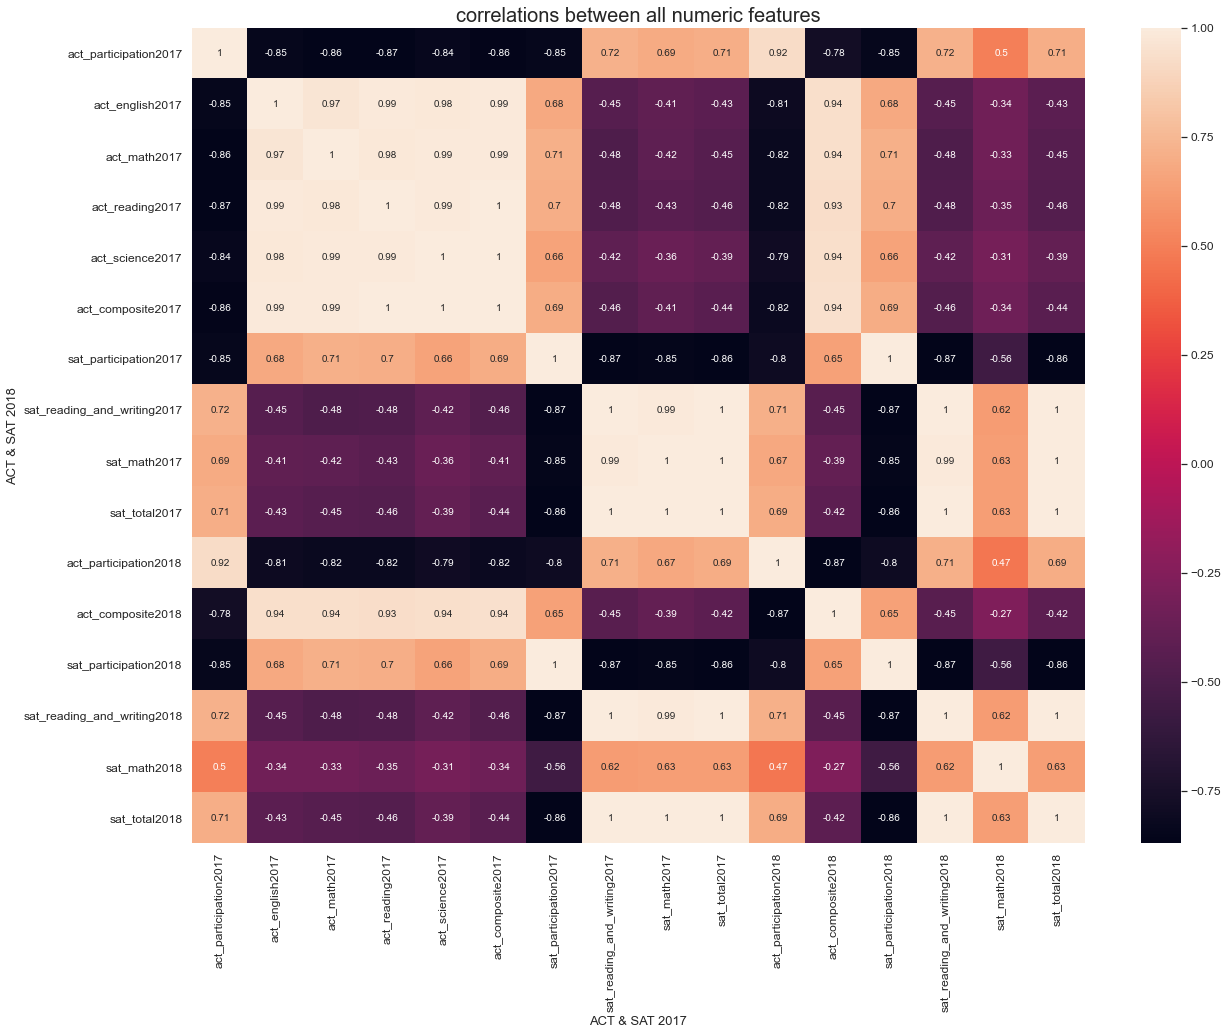

In [78]:
fig, ax = plt.subplots(figsize=(20,15)) 

sns.heatmap(final.corr(),annot=True)

plt.title('correlations between all numeric features', fontsize= 20)
plt.xlabel('ACT & SAT 2017', fontsize= 13)
plt.ylabel('ACT & SAT 2018', fontsize= 13);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [79]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10,16)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i],fontsize=20)
        ax[i].set_xlabel(list_of_xlabels[i],fontsize=20)
        ax[i].set_ylabel('Number of States',fontsize=20)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

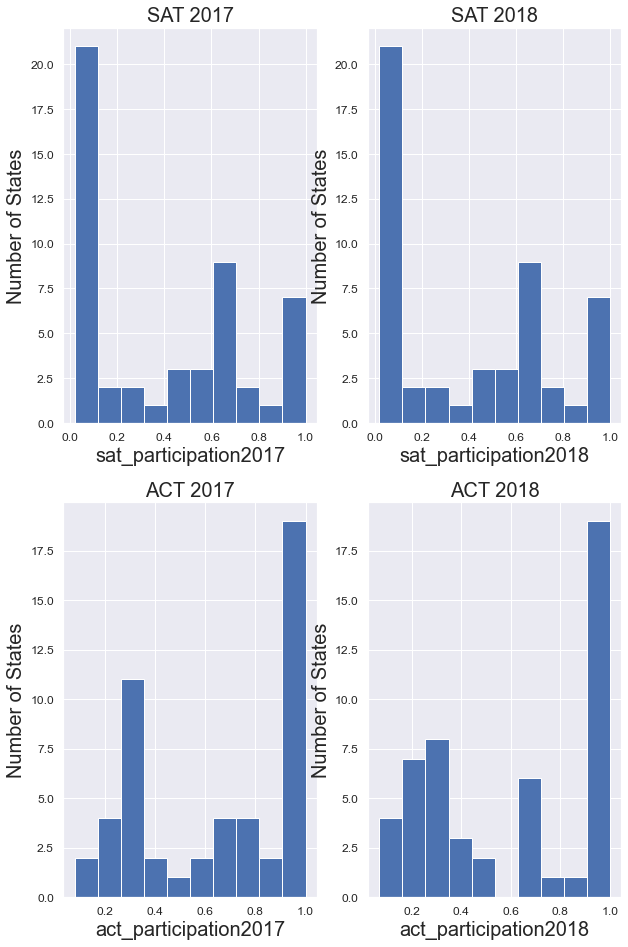

In [80]:
# Code
list_of_columns = ['sat_participation2017','sat_participation2018','act_participation2017','act_participation2018']

list_of_titles = ['SAT 2017','SAT 2018','ACT 2017','ACT 2018']

list_of_xlabels = [i for i in list_of_columns] 


subplot_histograms(final,list_of_columns,list_of_titles,list_of_xlabels)

<p style="color:green;font-weight:bold;">
Here participating rate of SAT in the year of 2017 and 2018 Didn't change much and it is leftly skewed. The percentage rate is almostr 1% for 25 states.In the other hand participating rate of ACT in the year of 2017 and 2018 is rightly skewed and the rate is 1005 for almost 20 states.
</p>

In [81]:
act_2018.head()

,state,act_participation,act_composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


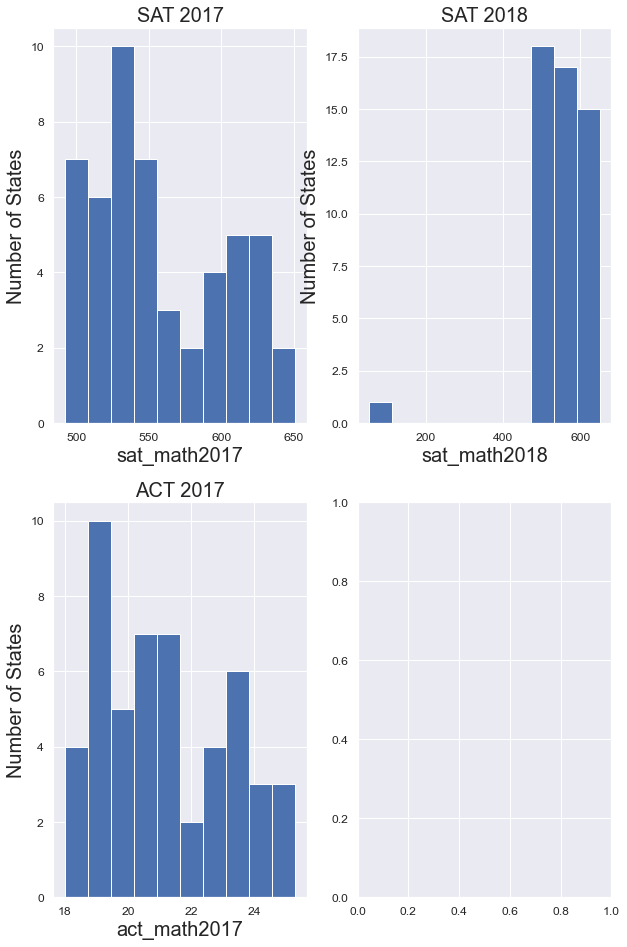

In [82]:
list_of_columns = ['sat_math2017','sat_math2018','act_math2017']

list_of_titles = ['SAT 2017','SAT 2018','ACT 2017','ACT 2018']

list_of_xlabels = [i for i in list_of_columns]  

subplot_histograms(final,list_of_columns,list_of_titles,list_of_xlabels)

<p style="color:green;font-weight:bold;">
Here the total number of math for SAT is Rightly skewed and almost 400-600 number for about 18 states.Foe ACT is more left skewed and more than 50% states scored lower than 22.
</p>

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


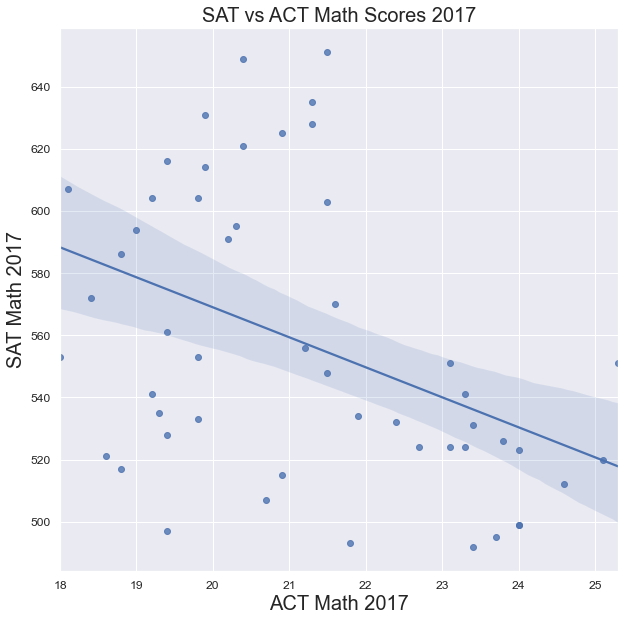

In [83]:
# Code
ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(y='sat_math2017', x='act_math2017', data=final[['sat_math2017','act_math2017']])
ax.set_title('SAT vs ACT Math Scores 2017',fontsize=20)
ax.set_xlabel('ACT Math 2017',fontsize=20)
ax.set_ylabel('SAT Math 2017',fontsize=20);

<p style="color:green;font-weight:bold;">
Here ACT score for Math is increasing and SAT score is decreasing but the correlations is low.Also standerd error is high.
</p>

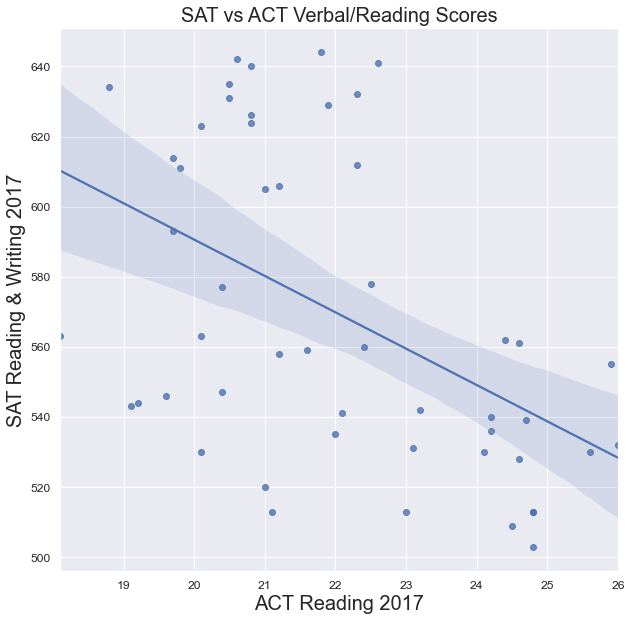

In [84]:
ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(y='sat_reading_and_writing2017', x='act_reading2017', data=final[['sat_reading_and_writing2017','act_reading2017']])
ax.set_title('SAT vs ACT Verbal/Reading Scores',fontsize=20)
ax.set_xlabel('ACT Reading 2017',fontsize=20)
ax.set_ylabel('SAT Reading & Writing 2017',fontsize=20);

<p style="color:green;font-weight:bold;">
Here ACT score for reading is decreasing and SAT score is increasing but the correlations is low.The data is really Scattered. 
</p>

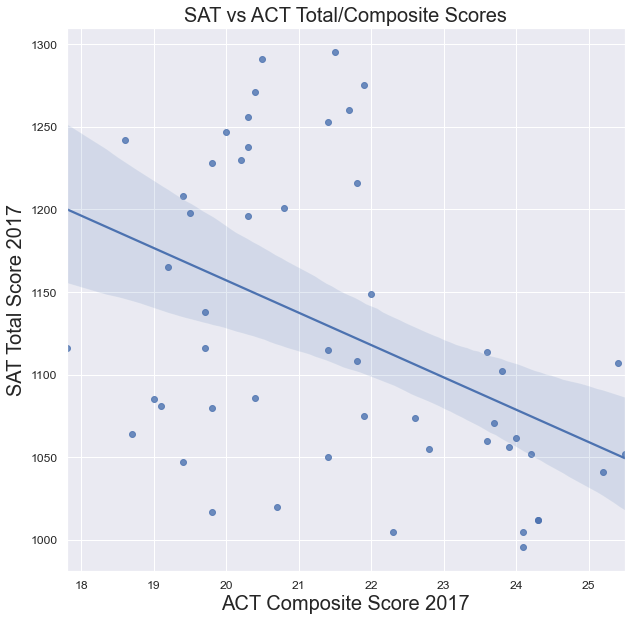

In [85]:
ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(y='sat_total2017', x='act_composite2017', data=final[['sat_total2017','act_composite2017']])
ax.set_title('SAT vs ACT Total/Composite Scores',fontsize=20)
ax.set_xlabel('ACT Composite Score 2017',fontsize=20)
ax.set_ylabel('SAT Total Score 2017',fontsize=20);

<p style="color:green;font-weight:bold;">
Here ACT Composite score is decreasing and SAT score is increasing but the correlations is low.The data is really Scattered and also have high Standard error. 
</p>

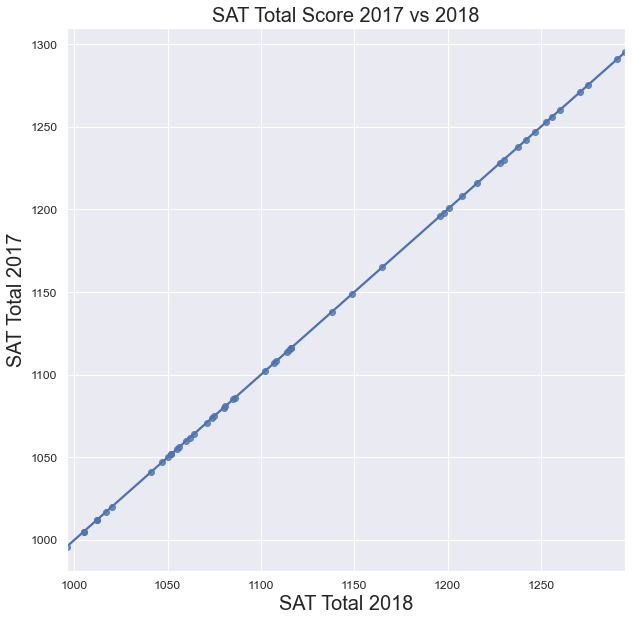

In [86]:
ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(y='sat_total2017', x='sat_total2018', data=final[['sat_total2017','sat_total2018']])
ax.set_title('SAT Total Score 2017 vs 2018',fontsize=20)
ax.set_xlabel('SAT Total 2018',fontsize=20)
ax.set_ylabel('SAT Total 2017',fontsize=20);


<p style="color:green;font-weight:bold;">
For SAT total in 2017 & 2018 both increasing at the same time and the data is highly correalated.
</p>

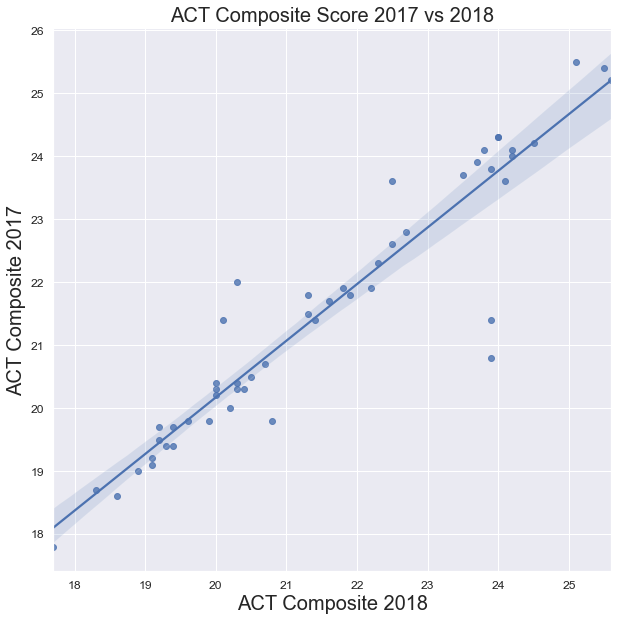

In [87]:
ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(y='act_composite2017', x='act_composite2018', data=final[['act_composite2017','act_composite2018']])
ax.set_title('ACT Composite Score 2017 vs 2018',fontsize=20)
ax.set_xlabel('ACT Composite 2018',fontsize=20)
ax.set_ylabel('ACT Composite 2017',fontsize=20);

<p style="color:green;font-weight:bold;">
For ACT Composite in 2017 & 2018 both increasing at the same time and the data is correalated with some standard error.
</p>

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

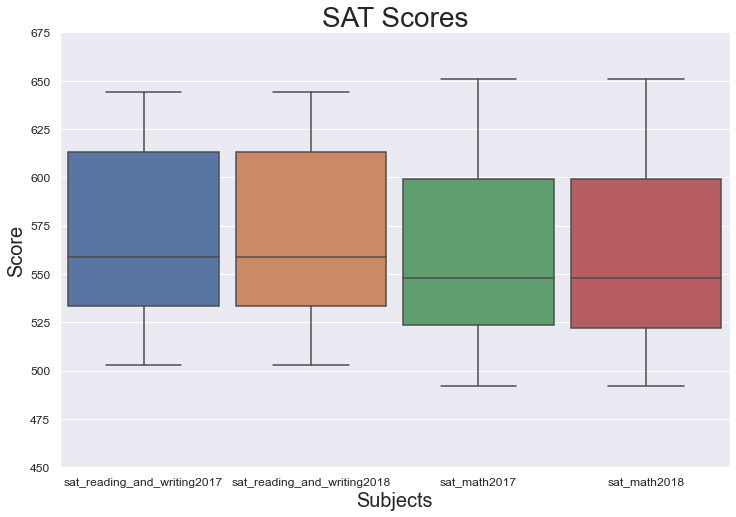

In [89]:
# Code
ax = plt.subplots(figsize=(12,8))
plt.title('SAT Scores',fontsize=28)
plt.xlabel('Subjects', fontsize=20)
plt.ylabel('Score',fontsize=20)
plt.ylim(450, 675)
sns.boxplot(data=final[['sat_reading_and_writing2017','sat_reading_and_writing2018','sat_math2017','sat_math2018']],width=0.9);

<p style="color:green;font-weight:bold;">
Here SAT reading and writing for both 2017 & 2018 students score between 530 to 610 and also the median is 560. And for Math scores are between 525 to 600 and the median is almost 560.
</p>

In [90]:
act_2018.head()

,state,act_participation,act_composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


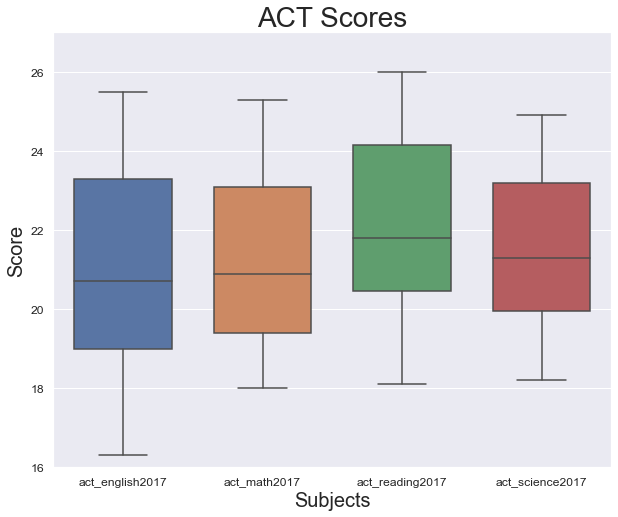

In [91]:
ax = plt.subplots(figsize=(10,8))
plt.title('ACT Scores',fontsize=28)
plt.xlabel('Subjects', fontsize=20)
plt.ylabel('Score',fontsize=20)
plt.ylim(16, 27)

sns.boxplot(data=final[['act_english2017','act_math2017','act_reading2017','act_science2017']],width=0.7);

<p style="color:green;font-weight:bold;">
For ACT 2017 english, math, reading and science students get scores between 19 to 24 and median is also like 21 almost.
</p>

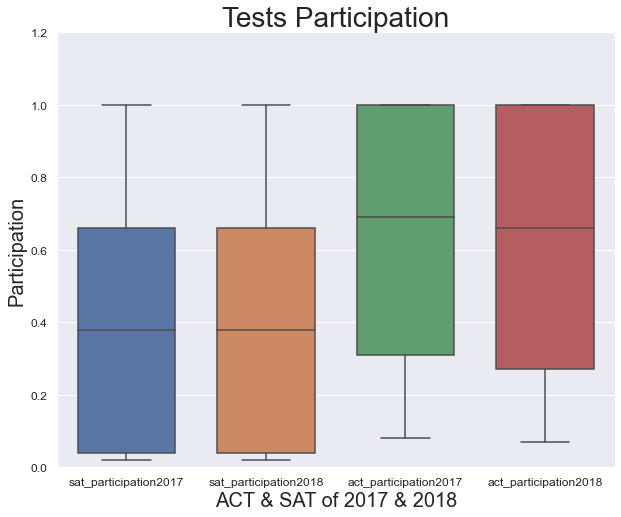

In [92]:
x = plt.subplots(figsize=(10,8))
plt.title('Tests Participation',fontsize=28)
plt.xlabel('ACT & SAT of 2017 & 2018', fontsize=20)
plt.ylabel('Participation',fontsize=20)
plt.ylim(0, 1.2)

sns.boxplot(data=final[['sat_participation2017','sat_participation2018','act_participation2017','act_participation2018']],width=0.7);

<p style="color:green;font-weight:bold;">
For SAT Participantion of 2017 & 2018 the percentage is almost 65% on the other hand ACT Participantion of 2017 & 2018 the percentage is almost 100%.
</p>

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [93]:
#showing the biggest movements in SAT participation
sat_participation_change = pd.DataFrame(final,columns=['state','sat_participation2018','sat_participation2017'])

sat_participation_change['diff'] = sat_participation_change['sat_participation2018'] - sat_participation_change['sat_participation2017']

#putting the top 5 and bottom 5 states in one DataFrame
sat_participation_change.sort_values(['diff'],ascending=False).head().append(sat_participation_change.sort_values(['diff'],ascending=False).tail())

,state,sat_participation2018,sat_participation2017,diff
0,Alabama,0.05,0.05,0.0
38,Pennsylvania,0.65,0.65,0.0
28,Nevada,0.26,0.26,0.0
29,New Hampshire,0.96,0.96,0.0
30,New Jersey,0.70,0.70,0.0
20,Maryland,0.69,0.69,0.0
21,Massachusetts,0.76,0.76,0.0
22,Michigan,1.00,1.00,0.0
23,Minnesota,0.03,0.03,0.0
50,Wyoming,0.03,0.03,0.0


In [94]:
#showing the biggest movements in ACT participation
act_participation_change = pd.DataFrame(final,columns=['state','act_participation2018','act_participation2017'])

act_participation_change['diff'] = act_participation_change['act_participation2018'] - act_participation_change['act_participation2017']

#putting the top 5 and bottom 5 states in one DataFrame
act_participation_change.sort_values(['diff'],ascending=False).head().append(act_participation_change.sort_values(['diff'],ascending=False).tail())

,state,act_participation2018,act_participation2017,diff
35,Ohio,1.00,0.75,0.25
27,Nebraska,1.00,0.84,0.16
2,Arizona,0.66,0.62,0.04
20,Maryland,0.31,0.28,0.03
37,Oregon,0.42,0.40,0.02
8,Florida,0.66,0.73,-0.07
22,Michigan,0.22,0.29,-0.07
1,Alaska,0.33,0.65,-0.32
12,Illinois,0.43,0.93,-0.50
5,Colorado,0.30,1.00,-0.70


#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/

https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

#### Key Takeaways ####

In the above data, participation rates are incentive by the State Department of Education's policies. The participation rate for the rate would increase if there is a requirement for all students to take a particular test.

Between 2017 and 2018, some states (Colorado, Connecticut, Delaware, Idaho, Illinois, Maine, Michigan, New Hampshire, Rhode Island, and West Virginia) and the District of Columbia covered the cost of the SAT for all their public school students. four years ago, only three states and the District of Columbia did so. This is the implementation of the SAT School Day contributed to the overall 25% increase in SAT test-takers.

#### Recommendions ####

Firstly, the SAT and ACT would be in terms of a mandatory test in all schools within the state.

Success stories can also be seen in states where the education department subsidizes the full costs of the test, making them more accessible to lower-income students.

Secondly, A college's admission criteria based on either of the tests' scores would have a huge impact on the perceived value of the test. The value to colleges of a single type of test for the admissions criteria is that they have a single metric which they can rank their applicants buy, rather than having to compare their over two sets of metrics

Furthermore, information about the test centers and their usage could also shed some light on the matter. These would help to identify both tactical and strategic targets for the College Board to further improve the SAT participation.

## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

In [291]:
t.T

,count,mean,std,min,25%,50%,75%,max
act_participation2017,51.0,0.647843,0.328063,0.08,0.31,0.69,1.00,1.0
act_english2017,51.0,20.927451,2.347942,16.30,19.00,20.70,23.30,25.5
act_math2017,51.0,21.192157,1.994878,18.00,19.40,20.90,23.10,25.3
act_reading2017,51.0,22.011765,2.064524,18.10,20.45,21.80,24.15,26.0
act_science2017,51.0,21.045098,3.185675,2.30,19.90,21.30,22.75,24.9
act_composite2017,51.0,21.521569,2.023395,17.80,19.80,21.40,23.60,25.5
sat_participation2017,51.0,0.397059,0.351126,0.02,0.04,0.38,0.66,1.0
sat_reading_and_writing2017,51.0,569.725490,44.679784,503.00,533.50,559.00,613.00,644.0
sat_math2017,51.0,548.235294,84.437335,52.00,522.00,548.00,599.00,651.0
sat_total2017,51.0,1127.313725,90.520382,996.00,1055.50,1107.00,1212.00,1295.0


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: As the sample size is more than 30, there is tendency for the data to be normally distributed. However, some of the current data still show a positive skew. Should the sample size be larger, the distribution in comparison would be 'more normal'.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: This assumption holds for the math and reading scores. The distributions for these two variables are close to normal.
As for the participation rates, the assumption does not hold. This is largely due to state level policies which results in skewed distributions.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: No it does not make sense to conduct statistical inference given these data. Although all 50 states are reflected in the data, more inferences can be drawn should there be more data points. Also, the participation rates do not reflect the actual number of students taking the tests. Minor changes in participation rates for certain states could actually result in a large increase in the overall number of test takers.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: No it is not appropriate. The SAT (200-800) and ACT math (1-36) scores have very large differences in terms of the scale that they use.


#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [292]:
# Code: